In [2]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# IMDb Top 250 movies links, titles and release years

In [3]:
url = 'https://www.imdb.com/chart/top/?ref_=nv_mv_250'
response = requests.get(url)
html = response.content
soup = bs(html, 'lxml')

In [4]:
href_list = []
for a in soup.find_all('a', href=True):
    href_list.append(a['href'])

In [5]:
href_list_filtered = []
for h in href_list:
    if '/title/' in h:
        href_list_filtered.append(h)

In [6]:
#getting the links to each of the top250 movies
href_list_unique = pd.Series(href_list_filtered).drop_duplicates().tolist()
href_list_unique = href_list_unique[1:]
href_list_unique

['/title/tt0111161/',
 '/title/tt0068646/',
 '/title/tt0468569/',
 '/title/tt0071562/',
 '/title/tt0050083/',
 '/title/tt0108052/',
 '/title/tt0167260/',
 '/title/tt0110912/',
 '/title/tt0120737/',
 '/title/tt0060196/',
 '/title/tt0109830/',
 '/title/tt0137523/',
 '/title/tt0167261/',
 '/title/tt1375666/',
 '/title/tt0080684/',
 '/title/tt0133093/',
 '/title/tt0099685/',
 '/title/tt0073486/',
 '/title/tt0114369/',
 '/title/tt0038650/',
 '/title/tt0047478/',
 '/title/tt0102926/',
 '/title/tt0120815/',
 '/title/tt0317248/',
 '/title/tt0816692/',
 '/title/tt0118799/',
 '/title/tt0120689/',
 '/title/tt0076759/',
 '/title/tt0103064/',
 '/title/tt0088763/',
 '/title/tt0245429/',
 '/title/tt0253474/',
 '/title/tt0054215/',
 '/title/tt6751668/',
 '/title/tt0110413/',
 '/title/tt0172495/',
 '/title/tt0110357/',
 '/title/tt0120586/',
 '/title/tt0407887/',
 '/title/tt2582802/',
 '/title/tt0482571/',
 '/title/tt0114814/',
 '/title/tt0034583/',
 '/title/tt0095327/',
 '/title/tt0056058/',
 '/title/t

In [7]:
titles = []
all_td = soup.find_all('td', class_='titleColumn')
for a in all_td:
    titles.append(a.get_text(strip=True))

In [8]:
result = [item.split('.',1)[1] for item in titles]
titles_result = [item.split('(',1)[0] for item in result]
#print(titles_result)

In [9]:
result = [item.split('.',1)[1] for item in titles]
year_result = [item.split('(',1)[1] for item in result]
year_result = [item.split(')',1)[0] for item in year_result]
#print(year_result)

In [46]:
#dataframe of the top250 movie title and release year
df_movies = pd.DataFrame(zip(titles_result, year_result), columns = ['Title', 'Year'])
df_movies['Year'] = df_movies['Year'].astype('int')
df_movies

,Title,Year
0,A remény rabjai,1994
1,A keresztapa,1972
2,A sötét lovag,2008
3,A keresztapa II,1974
4,Tizenkét dühös ember,1957
...,...,...
245,Brian élete,1979
246,Szuper haver,1999
247,A segítség,2011
248,Aladdin,1992


[]

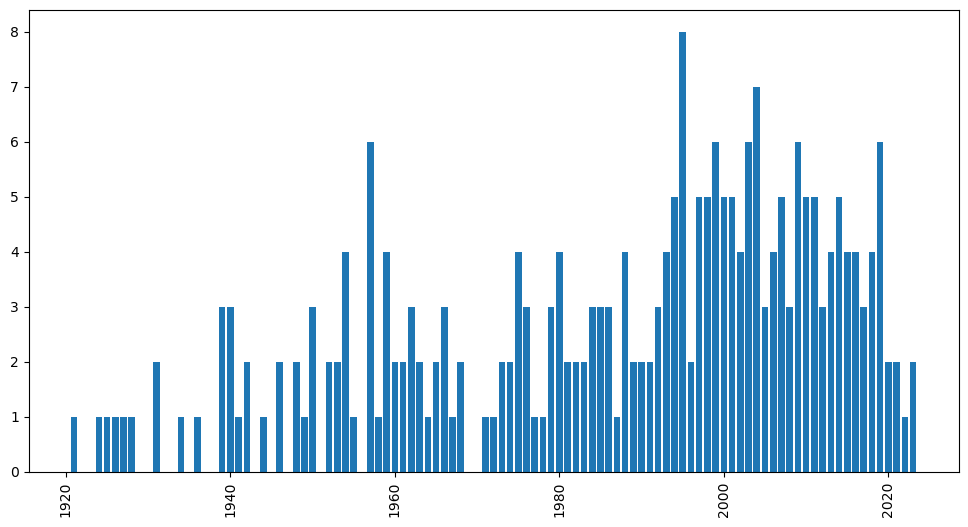

In [48]:
#bar chart of the movies by release year
vis_bar = df_movies.groupby('Year').count().reset_index()
plt.figure(figsize = (12,6))
plt.bar(vis_bar['Year'], vis_bar['Title'])
plt.xticks(rotation=90)
plt.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

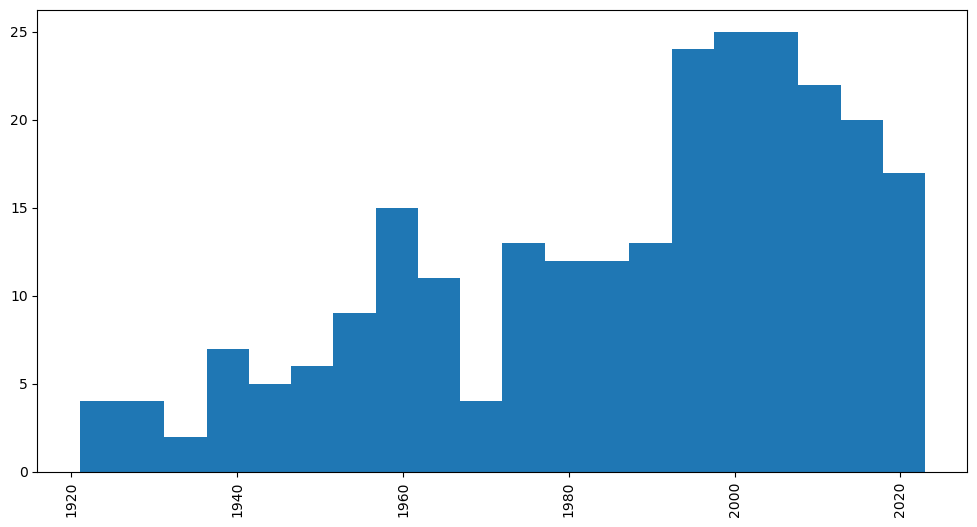

In [49]:
#histogram of the movies by release year
vis_hist = df_movies.sort_values(by=['Year'])
plt.figure(figsize = (12,6))
plt.hist(vis_hist['Year'], bins=20)
plt.xticks(rotation=90)
plt.show

[]

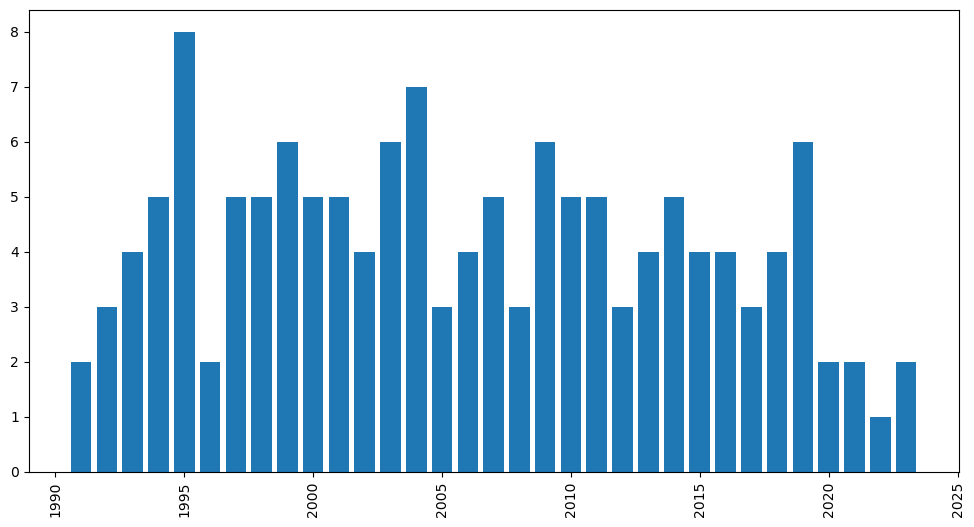

In [55]:
#bar chart of the movies after 1990
vis_bar = df_movies[df_movies['Year'] > 1990].groupby('Year').count().reset_index()
plt.figure(figsize = (12,6))
plt.bar(vis_bar['Year'], vis_bar['Title'])
plt.xticks(rotation=90)
plt.plot()

<function matplotlib.pyplot.show(close=None, block=None)>

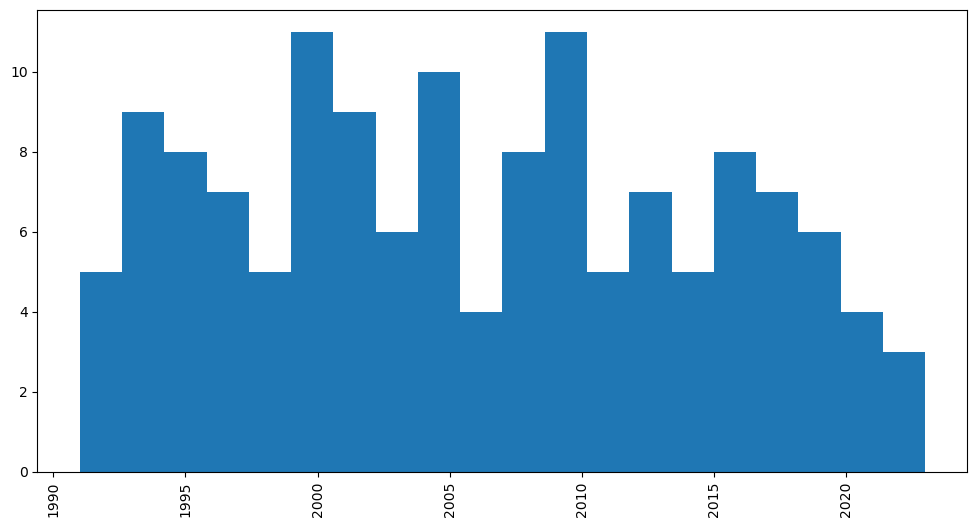

In [54]:
#histogram of the movies after 1990
vis_hist = df_movies[df_movies['Year'] > 1990]
plt.figure(figsize = (12,6))
plt.hist(vis_hist['Year'], bins=20)
plt.xticks(rotation=90)
plt.show

# The Shawshank Redemption main actors list, director and original title

In [56]:
#url of the movie The Shawshank Redemption
url = 'https://www.imdb.com/title/tt0111161/'
response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
html = response.content
soup = bs(html, 'lxml')

In [57]:
actors_list = []
actors = soup.find_all('a', class_='sc-bfec09a1-1 fUguci')
for a in actors:
    actors_list.append(a.get_text(strip=True))

In [58]:
#main actors of the movie from its imdb page
actors_list

['Tim Robbins',
 'Morgan Freeman',
 'Bob Gunton',
 'William Sadler',
 'Clancy Brown',
 'Gil Bellows',
 'Mark Rolston',
 'James Whitmore',
 'Jeffrey DeMunn',
 'Larry Brandenburg',
 'Neil Giuntoli',
 'Brian Libby',
 'David Proval',
 'Joseph Ragno',
 'Jude Ciccolella',
 'Paul McCrane',
 'Renee Blaine',
 'Scott Mann']

In [59]:
director = soup.find('a', class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link')
director.get_text()

'Frank Darabont'

In [60]:
title = soup.find('span', class_='sc-afe43def-1 fDTGTb')
title.get_text()

'A remény rabjai'

# For loop to get the directors of top 10 movies

In [61]:
top_directors = []
for h in href_list_unique[:10]:
    url = f'https://www.imdb.com{h}'
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = response.content
    soup = bs(html, 'lxml')
    director = soup.find('a', class_='ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link')
    director = director.get_text()
    top_directors.append(director)

In [62]:
top_directors

['Frank Darabont',
 'Francis Ford Coppola',
 'Christopher Nolan',
 'Francis Ford Coppola',
 'Sidney Lumet',
 'Steven Spielberg',
 'Peter Jackson',
 'Quentin Tarantino',
 'Peter Jackson',
 'Sergio Leone']

# For loop to get the actors of top 10 movies

In [63]:
top_actors = []
for h in href_list_unique[:10]:
    url = f'https://www.imdb.com{h}'
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = response.content
    soup = bs(html, 'lxml')
    actors = soup.find_all('a', class_='sc-bfec09a1-1 fUguci')
    for a in actors:
        top_actors.append(a.get_text(strip=True))

In [64]:
top_actors

['Tim Robbins',
 'Morgan Freeman',
 'Bob Gunton',
 'William Sadler',
 'Clancy Brown',
 'Gil Bellows',
 'Mark Rolston',
 'James Whitmore',
 'Jeffrey DeMunn',
 'Larry Brandenburg',
 'Neil Giuntoli',
 'Brian Libby',
 'David Proval',
 'Joseph Ragno',
 'Jude Ciccolella',
 'Paul McCrane',
 'Renee Blaine',
 'Scott Mann',
 'Marlon Brando',
 'Al Pacino',
 'James Caan',
 'Diane Keaton',
 'Richard S. Castellano',
 'Robert Duvall',
 'Sterling Hayden',
 'John Marley',
 'Richard Conte',
 'Al Lettieri',
 'Abe Vigoda',
 'Talia Shire',
 'Gianni Russo',
 'John Cazale',
 'Rudy Bond',
 'Al Martino',
 'Morgana King',
 'Lenny Montana',
 'Christian Bale',
 'Heath Ledger',
 'Aaron Eckhart',
 'Michael Caine',
 'Maggie Gyllenhaal',
 'Gary Oldman',
 'Morgan Freeman',
 'Monique Gabriela Curnen',
 'Ron Dean',
 'Cillian Murphy',
 'Chin Han',
 'Nestor Carbonell',
 'Eric Roberts',
 'Ritchie Coster',
 'Anthony Michael Hall',
 'Keith Szarabajka',
 'Colin McFarlane',
 'Joshua Harto',
 'Al Pacino',
 'Robert De Niro',
 'R

# For loop to get the title and actors of top 10 movies

In [65]:
top_10 = []
for h in href_list_unique[:10]:
    url = f'https://www.imdb.com{h}'
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = response.content
    soup = bs(html, 'lxml')
    title = soup.find('span', class_='sc-afe43def-1 fDTGTb')
    title = title.get_text()
    actors = soup.find_all('a', class_='sc-bfec09a1-1 fUguci')
    for a in actors:
        top_actors = a.get_text(strip=True)
        top_10.append([title, top_actors])

In [119]:
top_10_df = pd.DataFrame(top_10, columns=['Movie', 'Actor'])
top_10_df

,Movie,Actor
0,A remény rabjai,Tim Robbins
1,A remény rabjai,Morgan Freeman
2,A remény rabjai,Bob Gunton
3,A remény rabjai,William Sadler
4,A remény rabjai,Clancy Brown
...,...,...
175,"A Jó, a Rossz és a Csúf",Angelo Novi
176,"A Jó, a Rossz és a Csúf",Antonio Casas
177,"A Jó, a Rossz és a Csúf",Aldo Sambrell
178,"A Jó, a Rossz és a Csúf",Al Mulock


In [120]:
from itertools import combinations

In [121]:
#group the actors by movies and generate all possible actor pairs within each movie
actor_pairs = top_10_df.groupby('Movie')['Actor'].apply(lambda x: list(combinations(x, 2))).tolist()

In [122]:
#flatten the list of actor pairs to create a single list of all actor pairs across all movies
all_pairs = [pair for sublist in actor_pairs for pair in sublist]

In [123]:
#count the frequency of each actor pair
pair_counts = pd.Series(all_pairs).value_counts()

In [124]:
result_10_df = pd.DataFrame(pair_counts, columns=['Count'])
result_10_df = result_10_df.reset_index()
result_10_df = result_10_df.rename(columns = {'index': 'Pair'})
result_10_df

,Pair,Count
0,"(Elijah Wood, Ian McKellen)",2
1,"(Ian McKellen, Cate Blanchett)",2
2,"(Robert Duvall, John Cazale)",2
3,"(Orlando Bloom, Sean Bean)",2
4,"(Talia Shire, Morgana King)",2
...,...,...
1478,"(Sterling Hayden, Al Martino)",1
1479,"(Sterling Hayden, Rudy Bond)",1
1480,"(Sterling Hayden, John Cazale)",1
1481,"(Sterling Hayden, Gianni Russo)",1


# The most common actor pairs among the top 250 movies

In [71]:
top_250 = []
for h in href_list_unique:
    url = f'https://www.imdb.com{h}'
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = response.content
    soup = bs(html, 'lxml')
    title = soup.find('span', class_='sc-afe43def-1 fDTGTb')
    title = title.get_text()
    actors = soup.find_all('a', class_='sc-bfec09a1-1 fUguci')
    for a in actors:
        top_actors = a.get_text(strip=True)
        top_250.append([title, top_actors])

In [200]:
top_250_df = pd.DataFrame(top_250, columns=['Movie', 'Actor'])
top_250_df

,Movie,Actor
0,A remény rabjai,Tim Robbins
1,A remény rabjai,Morgan Freeman
2,A remény rabjai,Bob Gunton
3,A remény rabjai,William Sadler
4,A remény rabjai,Clancy Brown
...,...,...
4427,Farkasokkal táncoló,Tony Pierce
4428,Farkasokkal táncoló,Doris Leader Charge
4429,Farkasokkal táncoló,Tom Everett
4430,Farkasokkal táncoló,Larry Joshua


In [201]:
actor_pairs = top_250_df.groupby('Movie')['Actor'].apply(lambda x: list(combinations(x, 2))).tolist()
all_pairs = [pair for sublist in actor_pairs for pair in sublist]

In [202]:
pair_counts = pd.Series(all_pairs).value_counts()

In [203]:
result_df = pd.DataFrame(pair_counts, columns=['Count'])
result_df = result_df.reset_index()
result_df = result_df.rename(columns = {'index': 'Pair'})
result_df[result_df['Count'] == 4]

,Pair,Count
0,"(Takashi Shimura, Minoru Chiaki)",4
1,"(Charles Chaplin, Henry Bergman)",4
2,"(Toshirô Mifune, Takashi Shimura)",4
3,"(Robert De Niro, Joe Pesci)",4
4,"(Christian Bale, Michael Caine)",4


In [217]:
result_df[result_df['Count'] == 3].head()

,Pair,Count
5,"(Orlando Bloom, Cate Blanchett)",3
6,"(Toshirô Mifune, Eijirô Tôno)",3
7,"(Christian Bale, Morgan Freeman)",3
8,"(Christian Bale, Gary Oldman)",3
9,"(Orlando Bloom, Billy Boyd)",3


In [219]:
result_df.head(20)

,Pair,Count
0,"(Takashi Shimura, Minoru Chiaki)",4
1,"(Charles Chaplin, Henry Bergman)",4
2,"(Toshirô Mifune, Takashi Shimura)",4
3,"(Robert De Niro, Joe Pesci)",4
4,"(Christian Bale, Michael Caine)",4
5,"(Orlando Bloom, Cate Blanchett)",3
6,"(Toshirô Mifune, Eijirô Tôno)",3
7,"(Christian Bale, Morgan Freeman)",3
8,"(Christian Bale, Gary Oldman)",3
9,"(Orlando Bloom, Billy Boyd)",3


# The most common actor trios among the top 250 movies

In [205]:
actor_trios = top_250_df.groupby('Movie')['Actor'].apply(lambda x: list(combinations(x, 3))).tolist()
all_trios = [pair for sublist in actor_trios for pair in sublist]
trios_counts = pd.Series(all_trios).value_counts()

In [218]:
result_trio_df = pd.DataFrame(trios_counts, columns=['Count'])
result_trio_df = result_trio_df.reset_index()
result_trio_df = result_trio_df.rename(columns = {'index': 'Trio'})
result_trio_df[result_trio_df['Count'] == 3].head(15)

,Trio,Count
0,"(Harrison Ford, Carrie Fisher, Alec Guinness)",3
1,"(Mark Hamill, Carrie Fisher, David Prowse)",3
2,"(Elijah Wood, Ian McKellen, Cate Blanchett)",3
3,"(Ian McKellen, Sean Astin, Cate Blanchett)",3
4,"(Elijah Wood, Orlando Bloom, Sean Astin)",3
5,"(Elijah Wood, Orlando Bloom, Billy Boyd)",3
6,"(Ian McKellen, Sean Astin, Billy Boyd)",3
7,"(Elijah Wood, Orlando Bloom, Cate Blanchett)",3
8,"(Elijah Wood, Viggo Mortensen, Cate Blanchett)",3
9,"(Toshirô Mifune, Takashi Shimura, Minoru Chiaki)",3


# Visualization of the actor pairs who appeared in more than one movies together on a graph

In [207]:
first_vis_result_df = result_df[result_df['Count'] > 1]

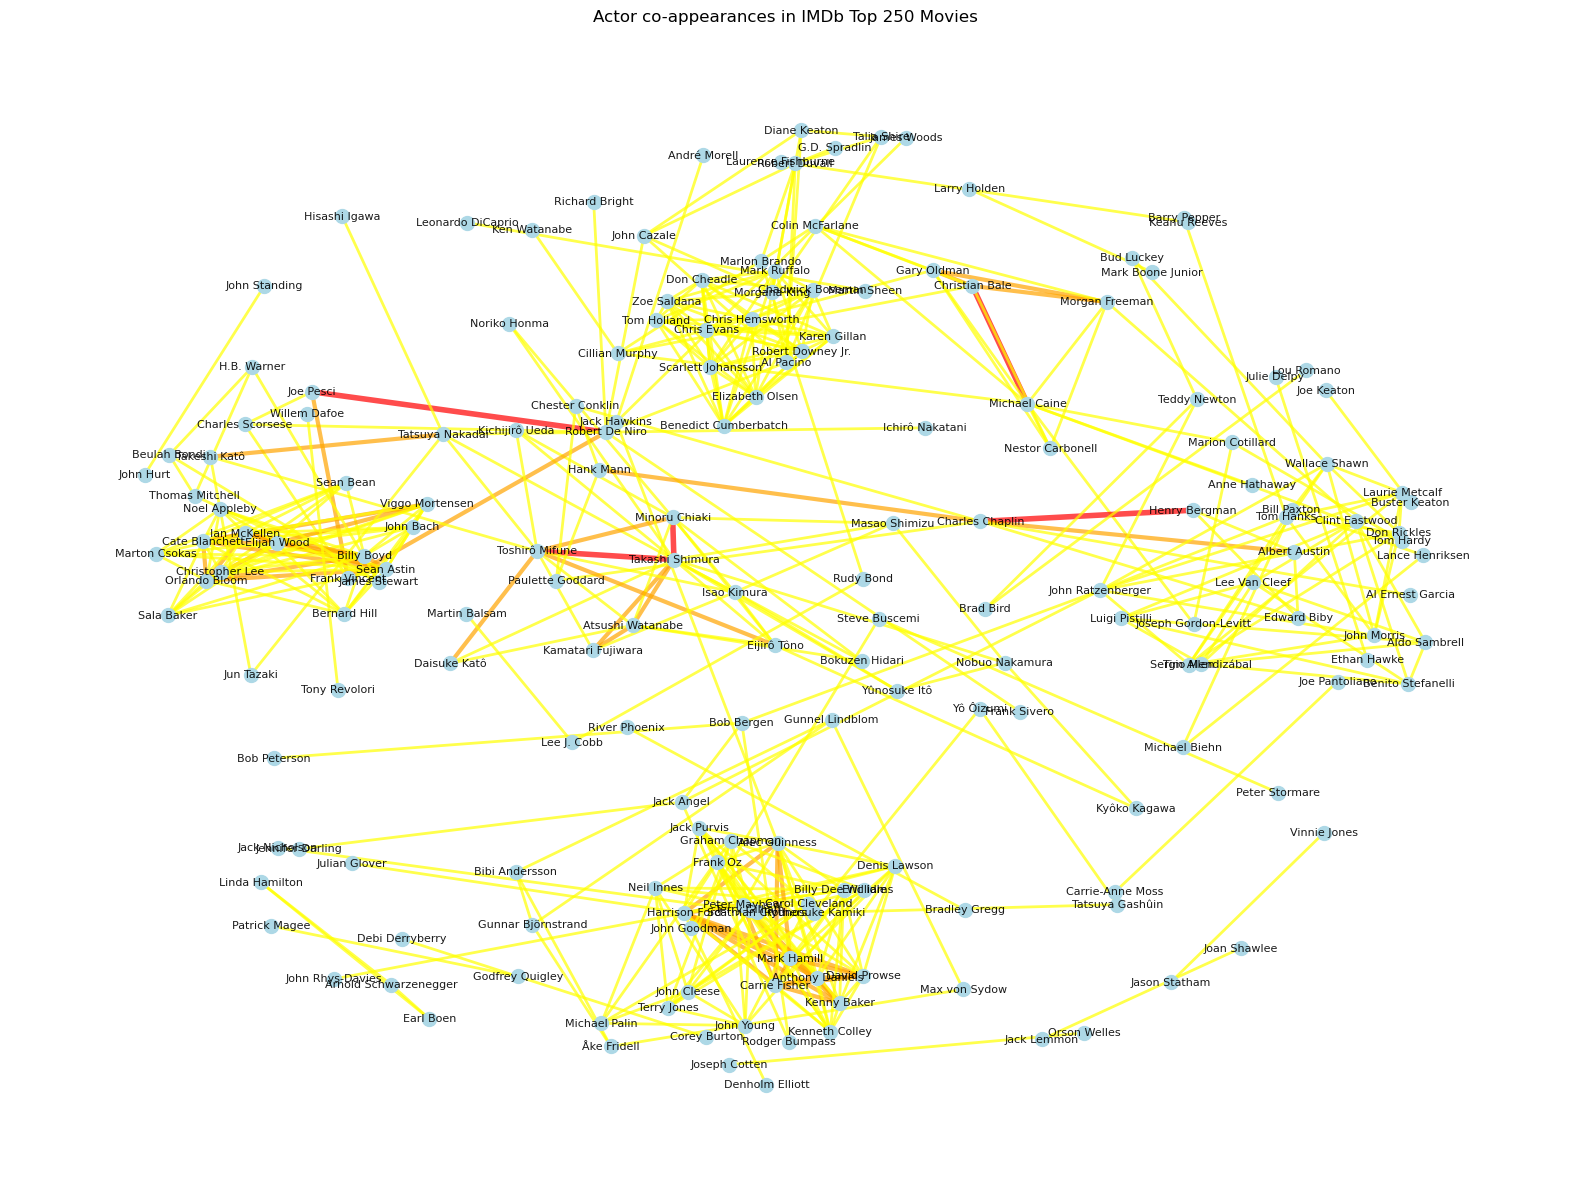

In [216]:
import networkx as nx

first_vis_result_df = first_vis_result_df.sort_values('Count', ascending=False).reset_index(drop=True)

G = nx.Graph()

#iterate over the pairs and their counts
for _, row in first_vis_result_df.iterrows():
    pair = row['Pair']
    count = row['Count']
    actor1, actor2 = pair
    G.add_edge(actor1, actor2, weight=count)

plt.figure(figsize=(20, 15))

#set positions for nodes
pos = nx.spring_layout(G, k=0.6)

#get weights for the edges
weights = [G[u][v]['weight'] for u, v in G.edges()]

#color mapping based on appearances together
color_mapping = {2: 'yellow', 3: 'orange', 4: 'red'}

#draw nodes
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')

#draw edges with thickness and color based on weights
edge_colors = [color_mapping[G[u][v]['weight']] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.7, edge_color=edge_colors)

#draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', alpha=0.9)

plt.axis('off')
plt.title('Actor co-appearances in IMDb Top 250 Movies')
plt.show()

# Visualization of the actor pairs who appeared in more than two movies together on a graph

In [209]:
second_vis_result_df = result_df[result_df['Count'] > 2]

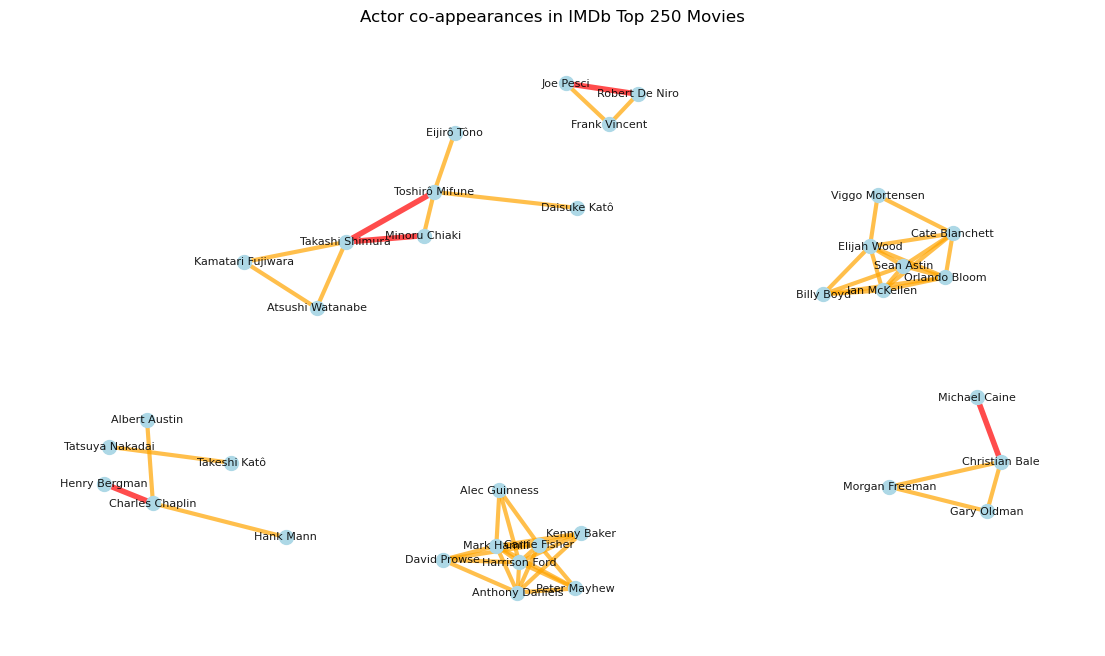

In [214]:
second_vis_result_df = second_vis_result_df.sort_values('Count', ascending=False).reset_index(drop=True)

G = nx.Graph()

for _, row in second_vis_result_df.iterrows():
    pair = row['Pair']
    count = row['Count']
    actor1, actor2 = pair
    G.add_edge(actor1, actor2, weight=count)

plt.figure(figsize=(14, 8))

pos = nx.spring_layout(G, k=0.6)

weights = [G[u][v]['weight'] for u, v in G.edges()]

color_mapping = {3: 'orange', 4: 'red'}

nx.draw_networkx_nodes(G, pos, node_size=100, node_color='lightblue')

edge_colors = [color_mapping[G[u][v]['weight']] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=weights, alpha=0.7, edge_color=edge_colors)

nx.draw_networkx_labels(G, pos, font_size=8, font_color='black', alpha=0.9)

plt.axis('off')
plt.title('Actor co-appearances in IMDb Top 250 Movies')
plt.show()